In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense,Conv2D,Dense, Dropout, Flatten, Input
import os
import matplotlib.pyplot as plt
from keras import Sequential,layers
import cv2
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy

In [75]:
## resize train image
if not os.path.exists(r'C:/Users/Admin/Downloads/resized_image'):
  os.makedirs(r'C:/Users/Admin/Downloads/resized_image')

base_width = 600  ## in pixel
for i in os.listdir(r'C:/Users/Admin/Downloads/aio-hutech/train'):
  file_path = r'C:/Users/Admin/Downloads/aio-hutech/train/'+ i
  for j in os.listdir(file_path):
    img_path = file_path + '/'+ j
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    if not os.path.exists(r'C:/Users/Admin/Downloads/resized_image/'+i):
      os.makedirs(r'C:/Users/Admin/Downloads/resized_image/'+i)
    img.save(r'C:/Users/Admin/Downloads/resized_image/'+i+'/'+j)


C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN001.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN002.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN003.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN004.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN005.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN006.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN007.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN008.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN009.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN010.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN011.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN012.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN013.jpg
C:/Users/Admin/Downloads/aio-hutech/train/bào ngư xám + trắng/BN

In [78]:
## resize test image
if not os.path.exists(r'C:/Users/Admin/Downloads/test_resized_image'):
  os.makedirs(r'C:/Users/Admin/Downloads/test_resized_image')

base_width = 600  ## in pixel
for i in os.listdir(r'C:/Users/Admin/Downloads/aio-hutech/test'):
    img_path = r'C:/Users/Admin/Downloads/aio-hutech/test/'+ i
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    img.save(r'C:/Users/Admin/Downloads/test_resized_image/'+i)


C:/Users/Admin/Downloads/aio-hutech/test/001.jpg
C:/Users/Admin/Downloads/aio-hutech/test/002.jpg
C:/Users/Admin/Downloads/aio-hutech/test/003.jpg
C:/Users/Admin/Downloads/aio-hutech/test/004.jpg
C:/Users/Admin/Downloads/aio-hutech/test/005.jpg
C:/Users/Admin/Downloads/aio-hutech/test/006.jpg
C:/Users/Admin/Downloads/aio-hutech/test/007.jpg
C:/Users/Admin/Downloads/aio-hutech/test/008.jpg
C:/Users/Admin/Downloads/aio-hutech/test/009.jpg
C:/Users/Admin/Downloads/aio-hutech/test/010.jpg
C:/Users/Admin/Downloads/aio-hutech/test/011.jpg
C:/Users/Admin/Downloads/aio-hutech/test/012.jpg
C:/Users/Admin/Downloads/aio-hutech/test/013.jpg
C:/Users/Admin/Downloads/aio-hutech/test/014.jpg
C:/Users/Admin/Downloads/aio-hutech/test/015.jpg
C:/Users/Admin/Downloads/aio-hutech/test/016.jpg
C:/Users/Admin/Downloads/aio-hutech/test/017.jpg
C:/Users/Admin/Downloads/aio-hutech/test/018.jpg
C:/Users/Admin/Downloads/aio-hutech/test/019.jpg
C:/Users/Admin/Downloads/aio-hutech/test/020.jpg
C:/Users/Admin/Downl

In [80]:
### rename train file
for i in os.listdir(r'C:/Users/Admin/Downloads/resized_image'):
    file_path = r'C:/Users/Admin/Downloads/resized_image/'+i
    print(file_path)
    if i == 'bào ngư xám + trắng':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/1')
    elif i == 'Đùi gà Baby (cắt ngắn)':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/2')
    elif i == 'linh chi trắng':
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/3')
    else:
        os.rename(file_path,r'C:/Users/Admin/Downloads/resized_image/0')

C:/Users/Admin/Downloads/resized_image/bào ngư xám + trắng
C:/Users/Admin/Downloads/resized_image/linh chi trắng
C:/Users/Admin/Downloads/resized_image/nấm mỡ
C:/Users/Admin/Downloads/resized_image/Đùi gà Baby (cắt ngắn)


In [2]:
training_set = pd.DataFrame(columns=['path','label'])

for i in os.listdir(r'C:/Users/Admin/Downloads/resized_image'):
    file_path = r'C:/Users/Admin/Downloads/resized_image/'+i
    for j in os.listdir(file_path):
        img_path = file_path + '/'+ j
        temp_df = pd.DataFrame({'path': [img_path],'label': [int(i)]})
        training_set=pd.concat([training_set, temp_df])

In [3]:
training_set = training_set.reset_index(drop = True)
training_set

,path,label
0,C:/Users/Admin/Downloads/resized_image/0/NM001...,0
1,C:/Users/Admin/Downloads/resized_image/0/NM002...,0
2,C:/Users/Admin/Downloads/resized_image/0/NM003...,0
3,C:/Users/Admin/Downloads/resized_image/0/NM004...,0
4,C:/Users/Admin/Downloads/resized_image/0/NM005...,0
...,...,...
1195,C:/Users/Admin/Downloads/resized_image/3/LC296...,3
1196,C:/Users/Admin/Downloads/resized_image/3/LC297...,3
1197,C:/Users/Admin/Downloads/resized_image/3/LC298...,3
1198,C:/Users/Admin/Downloads/resized_image/3/LC299...,3


In [7]:
## resize image
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/test_resized_image'):
  os.makedirs('/content/drive/MyDrive/Colab Notebooks/test_resized_image')

base_width = 600  ## in pixel
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/test'):
    img_path = '/content/drive/MyDrive/Colab Notebooks/test/'+ i
    print(img_path)
    img = Image.open(img_path)
    wpercent = (base_width / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
    img.save('/content/drive/MyDrive/Colab Notebooks/test_resized_image/'+i)


/content/drive/MyDrive/Colab Notebooks/test/176.jpg
/content/drive/MyDrive/Colab Notebooks/test/067.jpg
/content/drive/MyDrive/Colab Notebooks/test/040.jpg
/content/drive/MyDrive/Colab Notebooks/test/051.jpg
/content/drive/MyDrive/Colab Notebooks/test/031.jpg
/content/drive/MyDrive/Colab Notebooks/test/005.jpg
/content/drive/MyDrive/Colab Notebooks/test/042.jpg
/content/drive/MyDrive/Colab Notebooks/test/155.jpg
/content/drive/MyDrive/Colab Notebooks/test/064.jpg
/content/drive/MyDrive/Colab Notebooks/test/162.jpg
/content/drive/MyDrive/Colab Notebooks/test/009.jpg
/content/drive/MyDrive/Colab Notebooks/test/117.jpg
/content/drive/MyDrive/Colab Notebooks/test/097.jpg
/content/drive/MyDrive/Colab Notebooks/test/092.jpg
/content/drive/MyDrive/Colab Notebooks/test/085.jpg
/content/drive/MyDrive/Colab Notebooks/test/012.jpg
/content/drive/MyDrive/Colab Notebooks/test/113.jpg
/content/drive/MyDrive/Colab Notebooks/test/181.jpg
/content/drive/MyDrive/Colab Notebooks/test/126.jpg
/content/dri

In [5]:
testing_set = []
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/test_resized_image'):
    img_path = '/content/drive/MyDrive/Colab Notebooks/test_resized_image/'+ i
    print(img_path)
    img = cv2.imread(img_path)
    if img is not None:
      new_img = img / 255.0

/content/drive/MyDrive/Colab Notebooks/test_resized_image/176.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/040.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/067.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/031.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/051.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/042.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/005.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/155.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/162.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/064.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/009.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/117.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/097.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/092.jpg
/content/drive/MyDrive/Colab Notebooks/test_resized_image/085.jpg
/content/d

In [31]:
train_df, val_df = train_test_split(
    training_set,
    test_size=0.2,
    stratify=training_set['label'],  # keeps class balance
    random_state=42
)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

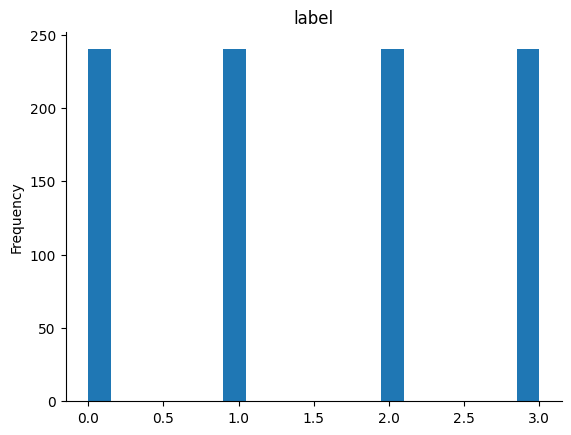

In [23]:
train_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)

In [61]:
# Basic ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col='path',
    y_col='label',
    target_size=(600, 600),
    batch_size=32,
    seed= 30,
    class_mode='categorical'  # or 'categorical' for multi-class
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 960 validated image filenames belonging to 4 classes.
Found 240 validated image filenames belonging to 4 classes.


In [81]:
model = Sequential()
model.add(layers.InputLayer((600,600,3)))
model.add(layers.Conv2D(20,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(15,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(10,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation = 'softmax'))
early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)
model.compile(optimizer=keras.optimizers.Adam(.0001),loss=CategoricalCrossentropy,metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 598, 598, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 299, 299, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 297, 297, 15)   │         2,715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 148, 148, 15)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 146, 146, 10)   │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 48, 48, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │     1,474,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481,639 (5.65 MB)

 Trainable params: 1,481,639 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
history = model.fit(train_generator, 
                    epochs=200,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,callbacks=[early_stopping])

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.3842 - loss: 1.3634

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 778ms/step - accuracy: 0.3856 - loss: 1.3624 - val_accuracy: 0.4732 - val_loss: 1.2417
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 624ms/step - accuracy: 0.4867 - loss: 1.1858 - val_accuracy: 0.6071 - val_loss: 0.9745
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 637ms/step - accuracy: 0.6403 - loss: 0.9362 - val_accuracy: 0.6652 - val_loss: 0.8116
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - accuracy: 0.6966 - loss: 0.7765 - val_accuracy: 0.7411 - val_loss: 0.7774
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 629ms/step - accuracy: 0.7434 - loss: 0.7100 - val_accuracy: 0.7902 - val_loss: 0.6539
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 627ms/step - accuracy: 0.7828 - loss: 0.6012 - val_accuracy: 0.7679 - val_loss: 0.6728
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 628ms/step - accuracy: 0.7868 - loss: 0.5722 - val_accuracy: 0.7411 - val_loss: 0.7185
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step - accuracy: 0.7699 - loss: 0.5969 - val_accuracy

KeyboardInterrupt: 

In [64]:
train_generator.image_shape

(600, 600, 3)